In [98]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import load_digits
from sklearn.datasets import make_classification, make_blobs, fetch_california_housing
import umap
from sklearn.utils import shuffle
import seaborn as sns

import ml_tools as ml
import help_tools as ht
import imp # imp.reload

#### Лайфхаки от go practise

**Пички на графиках**.  
Важно обращать внимание на любые флуктуации и аномалии, возникающие в метриках на дашбордах - возможно они дадут ключ к тому как стимулировать рост метрик (пички в метриках)

**Разбор сессий пользователей**  
https://gopractice.ru/data/sessions-yo/  
знание о паттернах поведения нескольких десятков пользователей может позволить получить  
информацию о тот как пользователи на данный момент используют продукт.  

Разбор сессий позволяет получить больше качественных инсайтов об использовании продукта,  
не углубляясь при этом в customer research техники.  

Создавая продукт, обычно проектируется его "правильное" использование, но клиенты всегда все  
делают по своему - способы использования продукта могут открыть глаза на некоторые его скрытые ценности.  

Концепция разбора сессий - частный случай важного фреймворка "делать то, что не масштабируется"
https://paulgraham.com/ds.html

**Объяснение поведения метрики (ее падение, неожиданный рост и пр.)**  

3) разбираясь с причинами падения/стагнации метрик - подходит история с декомпозицией по дереву, однако при сложной структуре дерева легко можно потерять композитный эффект (разные метрики будут вести себя по своему, большой шум итд)
тогда можно переходить к продуктовому подходу - проверять последовательно гипотезы связанные со снижением метрик в продукте (связанные с проблемными зонами)

3-2) если мы обнаружили совпадение изменения метрики и какого то изменения в продукте (прод подход) -> не факт что здесь причинная связь (надо проверять дополнительно)


4) сезонность и оценка ее влияния (способ)
берем несколько разных когорт клиентов и смотрим на вызревание их метрики — если в момент (например лета) все когорты начинают синхронно реагировать -> сезонность влияет на поведение метрик

5) сегментация = важный способ оценки поведения метрик
общая картина может быть менее наглядной чем при разбивке по сегментам

(!) декомпозиция, сегментация и проверка гипотез = обычно применяются вместе при расследовании об изменении поведения метрик

**RFM сегментация клиентов**  

Recency = how long was since the last activity
Freq = how often there were activities during last period (example, year)
Monetary = size of avg. check of user.

**111** - random users (with low stickiness)

**1[23][23]** - churn-users with good past history. Mails, bargains etc. to reactivate.

**xx1** - ****small check users (without supporting). Use recommendations system.

**31x** - new users. Onboarding.

**333** - big clients. Loyalty program and personalisation.

#### Визуальный анализ

Ключевая теория описана в нотбуке ML, раздел "Понижение размерностей"  
Здесь посмотрим основные примеры применения методов для ресерча в многомерном пространстве признаков  
  
Когда у нас большой объем данных + многомерное пространство, можно использовать PCA для понижения размерности,  
сохраняя достаточно информации. Далее методы вроде umap или tsne для двумерной визуализации кластеров.  

Если данных очень много и методы вычислительно долгие, можно использовать метод мини-кластеризации  
Предварительно через kmeans или dbscan кластеризовать данные с приемлемым качеством (например по силуэту),  
далее проводить анализ на этом объеме данных  
  
Для визуализации большого кол-ва точек можно использовать графики плотности вроде kde

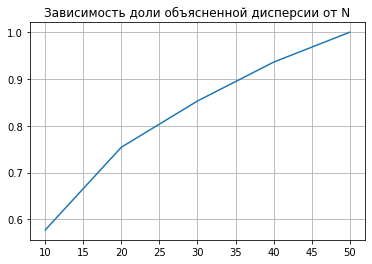

In [14]:
# генерируем кластеры в N мерном пространстве для анализа
X, y  = make_blobs(n_samples=1000, centers=15, n_features=50, random_state=0, cluster_std = 5, )

# применяем PCA для понижения размерностей
X_transform, evr, df_evr = ml.apply_pca(X, n_components = 0.95, n_components_range = [10,20,30,40,50])

plt.plot(df_evr.n_components, df_evr.evr)
plt.title('Зависимость доли объясненной дисперсии от N'); plt.grid()

Text(0.5, 1.0, 'Маппинг кластеров в двумерном пространстве')

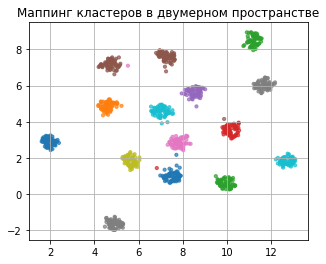

In [46]:
X_map = ml.apply_2d_map(X_transform)
plt.figure(figsize=(5, 4))
scatter = plt.scatter(X_map[:, 0], X_map[:, 1], c=y, cmap='tab10', s=10, alpha=0.7); plt.grid()
plt.title('Маппинг кластеров в двумерном пространстве')

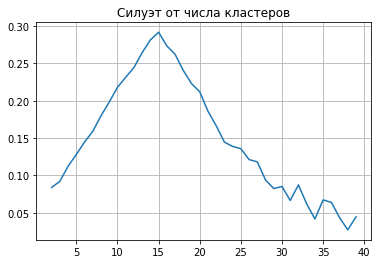

In [44]:
score_list = []
labels_list = []
n_range = list(range(1, 40))
for n in n_range:
    labels, metrics = ml.find_clusters(X_transform, n_clusters=n, scaler=False)
    score_list.append(metrics['silhouette'])
    labels_list.append(labels)
plt.plot(n_range, score_list); plt.title('Силуэт от числа кластеров'); plt.grid()

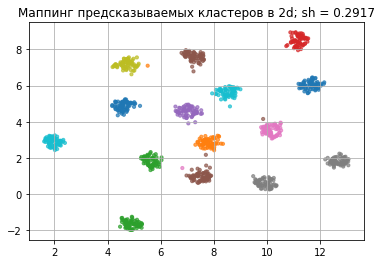

In [45]:
# правильно кластеризовали пространство
labels, metrics = ml.find_clusters(X_transform, n_clusters=15, scaler=False)
plt.scatter(X_map[:, 0], X_map[:, 1], c=labels, cmap='tab10', s=10, alpha=0.7)
plt.title(f"""Маппинг предсказываемых кластеров в 2d; sh = {np.round(metrics['silhouette'], 4)}"""); plt.grid()

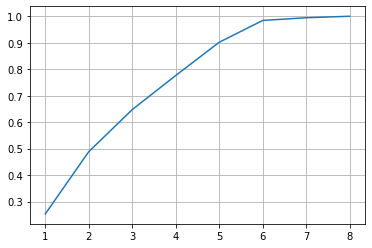

In [62]:
# ДАТАСЕТ ДОМОВ В КАЛИФОРНИИ
D = fetch_california_housing()
X, y = D['data'], D['target']
X_transform, evr, df_evr = ml.apply_pca(X, n_components = 0.95, n_components_range = [1,2,3,4,5,6,7,8])
plt.plot(df_evr.n_components, df_evr.evr); plt.grid()

Text(0.5, 1.0, 'Маппинг кластеров в двумерном пространстве')

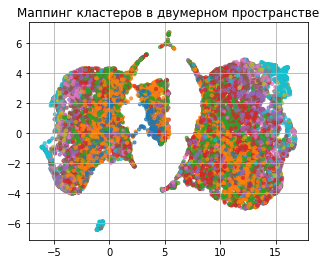

In [78]:
# полный маппинг, но может быть вычислительно долгим
X_map = ml.apply_2d_map(X_transform, random_state=42)
plt.figure(figsize=(5, 4))
scatter = plt.scatter(X_map[:, 0], X_map[:, 1], c=y, cmap='tab10', s=10, alpha=0.7); plt.grid()
plt.title('Маппинг кластеров в двумерном пространстве')

Text(0.5, 1.0, 'Маппинг кластеров в двумерном пространстве')

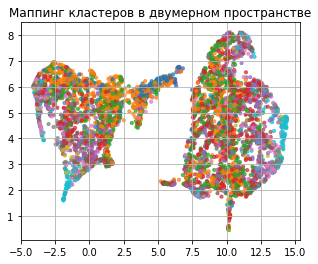

In [83]:
# случайный семплинг для более быстрых расчетов
# shuffle выбираем случайную подвыборку сохраняя индексное соответствие для X,Y
X_transform_sample, y_sample = shuffle(X_transform, y, n_samples = 5000)
X_map = ml.apply_2d_map(X_transform_sample, random_state=42, n_neighbors=40)
plt.figure(figsize=(5, 4))
scatter = plt.scatter(X_map[:, 0], X_map[:, 1], c=y_sample, cmap='tab10', s=10, alpha=0.7); plt.grid()
plt.title('Маппинг кластеров в двумерном пространстве')

Text(0.5, 1.0, 'Маппинг кластеров в двумерном пространстве')

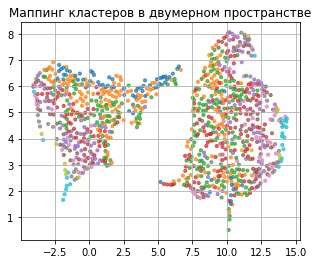

In [119]:
# Разбиение датасета X_map на множество кластеров для упрощения визуализации
# сжатие данных с сохранением структуры через мини-кластеры
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=1000, random_state=42)
kmeans.fit(X_map)
centroids = kmeans.cluster_centers_ # координаты центров кластеров
labels = kmeans.labels_ # массив меток
weights = np.bincount(labels)

# вычисляем среднее значение таргета в кластере
dfm = pd.DataFrame(X_map)
dfm['y_sample'] = y_sample
dfm['labels'] = labels
tmp = dfm.groupby('labels').y_sample.mean().reset_index()

# отображение
plt.figure(figsize=(5, 4))
scatter = plt.scatter(centroids[:, 0], centroids[:, 1], c=tmp.y_sample.values, cmap='tab10', s=10, alpha=0.7); plt.grid()
plt.title('Маппинг кластеров в двумерном пространстве')

In [157]:
def cluster_sampling(X, y, n_clusters):
    """
    Разбивает выборку на N кластеров, что позволяет заменить  
    каждый семпл выборки кластером с его центроидой, усредненным таргетом и весом (число точек)
    """
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X)
    df_cluster = pd.DataFrame(kmeans.cluster_centers_)
    df_cluster['weight'] = np.bincount(kmeans.labels_)
    tmp = pd.DataFrame(X); tmp['y'] = y; tmp['labels'] = kmeans.labels_
    df_cluster['y'] = tmp.groupby('labels').y.mean().reset_index().y.values
    return df_cluster

Text(0.5, 1.0, 'Маппинг кластеров в двумерном пространстве после kmeans')

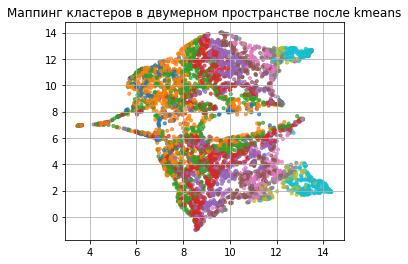

In [175]:
# сжимаем данные до меньшего кол-ва кластеров X_transform = датасет после PCA/Scaling
# ПОКА РЕЗУЛЬТАТ ПОЛУЧАЕТСЯ СТРАННЫЙ
# df = cluster_sampling(X_transform, y, 5000)

X_map = ml.apply_2d_map(df[df.columns[:8]].values, random_state=42, n_neighbors=20, scaler=True)
plt.figure(figsize=(5, 4))
scatter = plt.scatter(X_map[:, 0], X_map[:, 1], c=df.y.values, cmap='tab10', s=10, alpha=0.7); plt.grid()
plt.title('Маппинг кластеров в двумерном пространстве после kmeans')

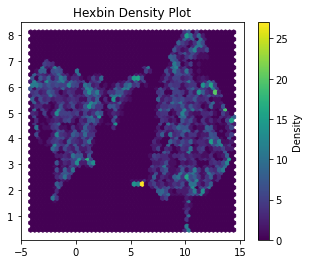

In [99]:
# Отображение большого скопления точек через диаграму плотностей с гранулами в виде пятиугольников
# Диаграмма плотности точек
plt.figure(figsize=(5, 4))
plt.hexbin(X_map[:, 0], X_map[:, 1], gridsize=50, cmap='viridis')
plt.colorbar(label='Density')
plt.title("Hexbin Density Plot")
plt.show()

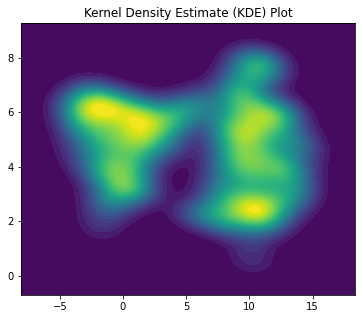

In [101]:
plt.figure(figsize=(6, 5))
sns.kdeplot(x=X_map[:, 0], y=X_map[:, 1], fill=True, cmap="viridis", thresh=0, levels=50)
plt.title("Kernel Density Estimate (KDE) Plot")
plt.show()